In [3]:
import torch
import math
import tqdm as notebook_tqdm
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


In [3]:
dtype = torch.float
device = torch.device("mps")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 80.43270874023438
199 58.2984619140625
299 43.04463195800781
399 32.517208099365234
499 25.24390411376953
599 20.213748931884766
699 16.73131561279297
799 14.31800365447998
899 12.64396858215332
999 11.48166275024414
1099 10.673894882202148
1199 10.11203670501709
1299 9.720895767211914
1399 9.448368072509766
1499 9.25832748413086
1599 9.125713348388672
1699 9.033102989196777
1799 8.968379974365234
1899 8.923120498657227
1999 8.891448974609375
Result: y = -0.008491677232086658 + 0.8536783456802368 x + 0.0014649566728621721 x^2 + -0.0928947925567627 x^3


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
# don’t actually understand how/why this works with the OMP_NUM_THREADS=1
os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["CUDA_VISIBLE_DEVICES"]=""
# https://forums.fast.ai/t/fastai-on-apple-m1/86059/39

from fastai.vision.all import *

def label_func(f):
    return f[0].isupper()

path = untar_data(URLs.PETS)
path.ls()
files = get_image_files(path/"images")
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

/Users/mton/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# type: ignore
# ?? returns source for any function
??get_image_files
# ? returns commment for any function
?get_image_files
# doc(func) gets document links
doc(get_image_files)

Signature: get_image_files(path, recurse=True, folders=None)
Docstring: Get image files in `path` recursively, only in `folders`, if specified.
File:      ~/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/fastai/data/transforms.py
Type:      function


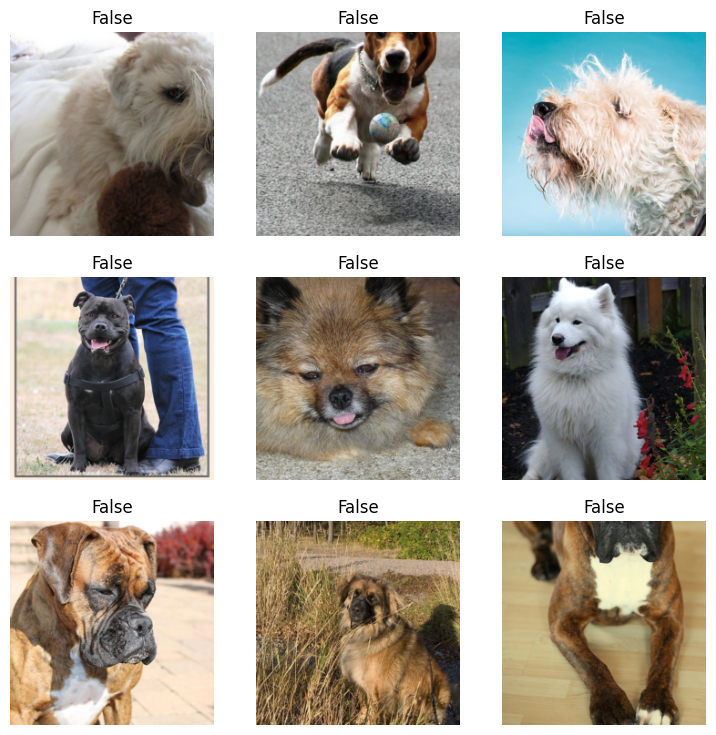

In [3]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [10]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
